# Trả lời câu 1

Đâu là thành phố, quốc gia có mật độ ô nhiễm cao nhất, thấp nhất trong 5 năm 2017 - 2021

In [43]:
#import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
path = './air_quality/dataset/airdata6years.csv'
df = pd.read_csv(path)

df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Rank,City,Country,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0,106.6,110.2,135.2,144.6
2,3,Hotan,China,101.5,NaN,NaN,158.0,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116.0,91.9
3,4,Delhi,India,96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,Jaunpur,India,95.3,182.2,143.5,91.0,70.0,51.1,40.7,33.5,34.2,36.8,75.7,196.0,195.7,NaN,NaN,NaN,NaN


***Thống kê thành phố có tỷ lệ ô nhiễm cao nhất, thấp nhất***

In [48]:
years = [2017, 2018, 2019, 2020, 2021]
years = np.array(years)

def findMax_MinCity(df, year):
    year_col = f'Year_{year}'
    
    max_row = df[year_col].idxmax()
    min_row = df[year_col].idxmin()
    
    max_city = df['City'].loc[max_row]
    min_city = df['City'].loc[min_row]
    
    lst = [year, max_city, min_city]
    
    return pd.Series(lst)

lst_value = []

for i in years:
    lst_value.append(findMax_MinCity(df, i))
    
max_min_df = pd.DataFrame(lst_value)

max_min_df = max_min_df.rename(columns = {0 : 'Year', 1 : 'Most polluted', 2 : 'Least polluted'})

max_min_df

,Year,Most polluted,Least polluted
0,2017,Gurugram,Bredkalen
1,2018,Gurugram,Judbury
2,2019,Ghaziabad,Captain Cook
3,2020,Hotan,Waimea
4,2021,Bhiwadi,Chu


***Vẽ biểu đồ cột thể hiện max min***

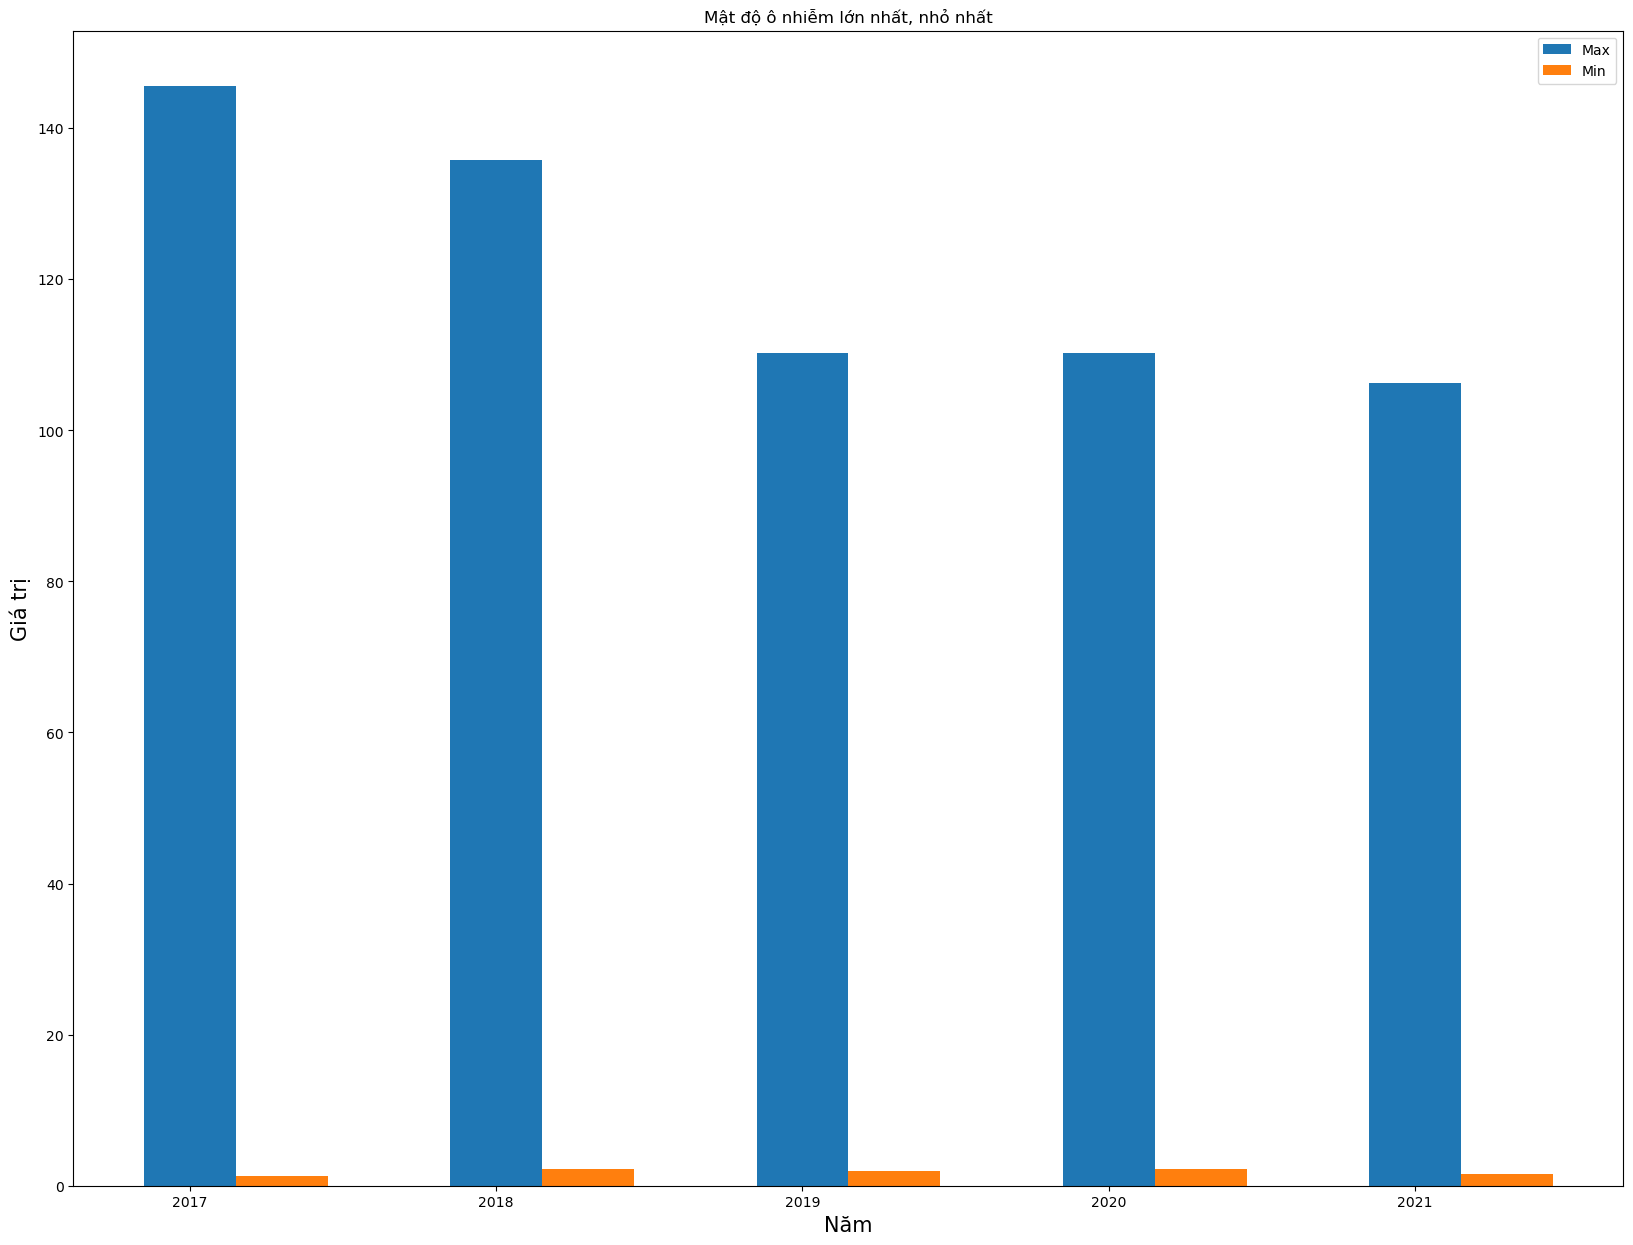

In [49]:
max_values = []
min_values = []

for i in years:
    year_col = f'Year_{i}'
    
    max = df[year_col].max()
    min = df[year_col].min()
    
    max_values.append(max)
    min_values.append(min)
    
plt.figure(figsize = (20, 15))
width = 0.3

plt.bar(years, max_values, width, label = 'Max')
plt.bar(years + width, min_values, width, label = 'Min')

#Customize chart
plt.title('Mật độ ô nhiễm lớn nhất, nhỏ nhất')
plt.xlabel('Năm', fontsize = 15)
plt.ylabel('Giá trị',fontsize = 15)

plt.legend()
plt.show()